# **Modul 4 Data Mining 2020 "K-Nearest Neighbors"**

Di modul ini, Anda akan memuat dataset pelanggan, menyesuaikan data, dan menggunakan K-Nearest Neighbors untuk memprediksi titik data. Tapi apa itu **K-Nearest Neighbors**?

**K-Nearest Neighbors** adalah algoritma untuk supervised learning. Di mana data 'dilatih' dengan titik data yang sesuai dengan klasifikasi mereka. Setelah suatu poin diprediksi, ia memperhitungkan poin 'K' terdekat untuk menentukan klasifikasinya.

## **Here's an visualization of the K-Nearest Neighbors algorithm.**

<center><img src = "https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png"></center>

Dalam hal ini, kami memiliki titik data Kelas A dan B. Kami ingin memprediksi apa bintang (titik data uji). Jika kita menganggap nilai k 3 (3 titik data terdekat) kita akan mendapatkan prediksi Kelas B. Namun jika kita mempertimbangkan nilai k 6, kita akan mendapatkan prediksi Kelas A.

Dalam hal ini, penting untuk mempertimbangkan nilai k. Tapi semoga dari diagram ini, Anda harus memahami apa algoritma K-Nearest Neighbours. Ini mempertimbangkan Tetangga terdekat 'K' (poin) ketika memprediksi klasifikasi titik uji.

## **Lets load requiered libraries**

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## **About dataset**

Bayangkan penyedia telekomunikasi membagi segmen basis pelanggannya dengan pola penggunaan layanan, mengelompokkan pelanggan menjadi empat kelompok. Jika data demografis dapat digunakan untuk memprediksi keanggotaan grup, perusahaan dapat menyesuaikan penawaran untuk calon pelanggan individu. Ini adalah masalah klasifikasi. Yaitu, mengingat dataset, dengan label yang telah ditentukan, kita perlu membangun model yang akan digunakan untuk memprediksi kelas kasus baru atau tidak dikenal.

Contoh ini berfokus pada penggunaan data demografis, seperti wilayah, usia, dan perkawinan, untuk memprediksi pola penggunaan.

Bidang target, disebut **custcat**, memiliki empat nilai yang mungkin sesuai dengan empat grup pelanggan, sebagai berikut:
* Layanan Dasar 
* Layanan-E
* Layanan Plus-Layanan
* Total Layanan

Tujuan kami adalah untuk membangun classifier, untuk memprediksi kelas kasus yang tidak diketahui. Kami akan menggunakan jenis klasifikasi tertentu yang disebut K-Nearest Neighbors.

## **Lets download the dataset.**

In [0]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-02-11 10:02:46--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0.1s    

2020-02-11 10:02:47 (249 KB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



## **Load Data From CSV File**

In [0]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## **Data Visualization and Anylisis**

Mari kita lihat berapa banyak dari masing-masing kelas dalam kumpulan data kita.

In [0]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers


Anda dapat dengan mudah menjelajahi data Anda menggunakan teknik visualisasi:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9df04c59e8>]],
      dtype=object)

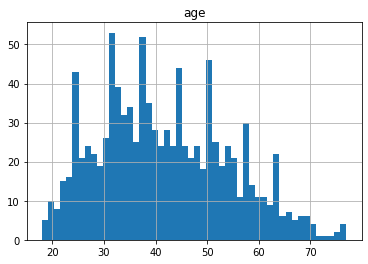

In [0]:
df.hist(column='age', bins=50)

## **Feature set**

Mari kita tentukan set fitur, X:

In [0]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

Untuk menggunakan pustaka scikit-learn, kita harus mengonversi Pandas data frame ke array Numpy:

In [0]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.,
          1.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.,
          4.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.,
          3.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.,
          1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.,
          3.]])

Definisikan label kelas dari data kita.

In [0]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

## **Normalize Data**

Standardisasi Data memberikan data nol mean dan varians unit, itu adalah praktik yang baik, terutama untuk algoritma seperti KNN yang didasarkan pada jarak kasus:

In [0]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004,  0.45813963],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794, -1.32797979],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577,  0.45813963]])

## **Train Test Split**

Out of Sample Accuracy adalah persentase prediksi yang benar yang dibuat model pada data yang modelnya TIDAK pernah dilatih. Melakukan train dan test pada dataset yang sama kemungkinan besar memiliki akurasi out-of-sample yang rendah, karena kemungkinan over-fit.

Penting bahwa model kami memiliki akurasi tinggi, di luar sampel, karena tujuan dari model apa pun, tentu saja, adalah untuk membuat prediksi yang benar pada data yang tidak diketahui. Jadi bagaimana kita dapat meningkatkan akurasi out-of-sample? Salah satu caranya adalah dengan menggunakan pendekatan evaluasi yang disebut Train / Test Split.
Train / Test Split melibatkan pemisahan dataset ke dalam set pelatihan dan pengujian masing-masing, yang saling eksklusif. Setelah ini, Anda berlatih dengan perangkat pelatihan dan menguji dengan perangkat uji.

Ini akan memberikan evaluasi yang lebih akurat dari akurasi sampel di luar karena dataset pengujian bukan bagian dari dataset yang telah digunakan untuk melatih data. Itu lebih realistis untuk masalah dunia nyata.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 12) (800,)
Test set: (200, 12) (200,)


## **K nearest neighbor (K-NN)**

### **Import library** 

In [0]:
from sklearn.neighbors import KNeighborsClassifier

### **Training**

Mari kita mulai algoritma dengan k = 4 untuk saat ini:

In [0]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

### **Predicting**

kita dapat menggunakan model untuk memprediksi set tes:

In [0]:
yhat = neigh.predict(X_test)
yhat[0:50]

array([3, 1, 1, 2, 4, 3, 3, 1, 3, 4, 4, 2, 4, 1, 3, 3, 4, 2, 3, 4, 2, 1,
       1, 4, 4, 3, 3, 1, 4, 2, 1, 1, 4, 4, 3, 3, 3, 2, 3, 3, 1, 4, 1, 1,
       2, 4, 3, 3, 2, 1])

### Accuracy evaluation

Dalam klasifikasi multilabel, __accuracy classification score__ fungsi menghitung akurasi subset. Fungsi ini sama dengan fungsi jaccard_similarity_score. Pada dasarnya, ini menghitung bagaimana mencocokkan label yang sebenarnya dan label yang diprediksi berada di set uji.

In [0]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.82875
Test set Accuracy:  0.735


K di KNN adalah jumlah tetangga terdekat untuk diperiksa. Seharusnya ditentukan oleh Pengguna. Jadi, bagaimana kita memilih K yang tepat? Solusi umum adalah memesan sebagian data Anda untuk menguji keakuratan model. Kemudian pilih k = 1, gunakan bagian pelatihan untuk pemodelan, dan hitung akurasi prediksi menggunakan semua sampel dalam set tes Anda. Ulangi proses ini, tambah k, dan lihat k mana yang terbaik untuk model Anda.

Kita dapat menghitung akurasi KNN untuk Ks yang berbeda.

In [0]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.76 , 0.68 , 0.725, 0.735, 0.73 , 0.755, 0.775, 0.77 , 0.765])